In [18]:
# importing the libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 data = pd.read_csv('Downloads/Google Play Store Apps Dataset/googleplaystore.csv')

In [3]:
data = data.copy(deep =True)

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:

# Basic Information Retrival
def basic_infos(data):
    print("Dataset shape is: ", data.shape,"\n")
    print("Dataset columns are: ",data.columns,"\n")
    print("Dataset dimensions are:",data.ndim,"\n")
    print("Dataset information is:\n",data.info(),"\n")
    categorical, numerical = [], []
    for i in data.columns:
        if data[i].dtype==object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical datatype columns are: ", [i for i in categorical],"\n")
    print("Numercial datatype columns are: ", [i for i in numerical],"\n")

In [6]:
basic_infos(data)

Dataset shape is:  (10841, 13) 

Dataset columns are:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object') 

Dataset dimensions are: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833

In [10]:
data.loc[10472, "Category"]


'1.9'

In [11]:
data.loc[10472, "Rating"]

19.0

In [12]:
data.loc[10472, "Category"] = "LIFESTYLE"
data.loc[10472, "Rating"] = 1.9
data.loc[10472, "Reviews"] = 19
data.loc[10472, "Size"] = "3.0M"
data.loc[10472, "Installs"] = "1000+"
data.loc[10472, "Type"] = "Free"
data.loc[10472, "Price"] = "0"
data.loc[10472, "Content Rating"] = "Everyone"
data.loc[10472, "Genres"] = "Lifestyle"
data.loc[10472, "Last Updated"] = "February 11, 2018"
data.loc[10472,"Current Ver"] = "1.0.19"
data.loc[10472, "Android Ver"] = "4.0 and up"

In [13]:
data['Reviews'] = data['Reviews'].astype(int)

In [14]:
def replace_in_in_price(price):
    if price == '0':
        price = 0
        return price
    elif '$' in price:
        price = price.replace("$","")
        return float(price)
data['Price'] = data["Price"].apply(lambda x: replace_in_in_price(x))
data['Price'].dtype

dtype('float64')

In [15]:
# For now we will convert the Last Updated into date-time format for easy continuing
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int32         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(9)
memory usage: 1.0+ MB


In [16]:
#Let's see about Nan values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

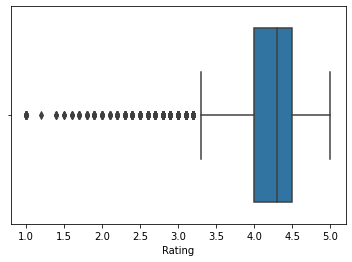

In [19]:
#We can see that there's some outliers, so for now in this case using Median as way for Fillna() is a better choice

sns.boxplot(data['Rating'])

In [20]:
#Using Median for Rating

data["Rating"] = data['Rating'].fillna(data['Rating'].median())

#Using Mode for Type and Android Ver

data['Type'] = data['Type'].fillna(data['Type'].mode()[0])
data['Android Ver'] = data['Android Ver'].fillna(data['Android Ver'].mode()[0])
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

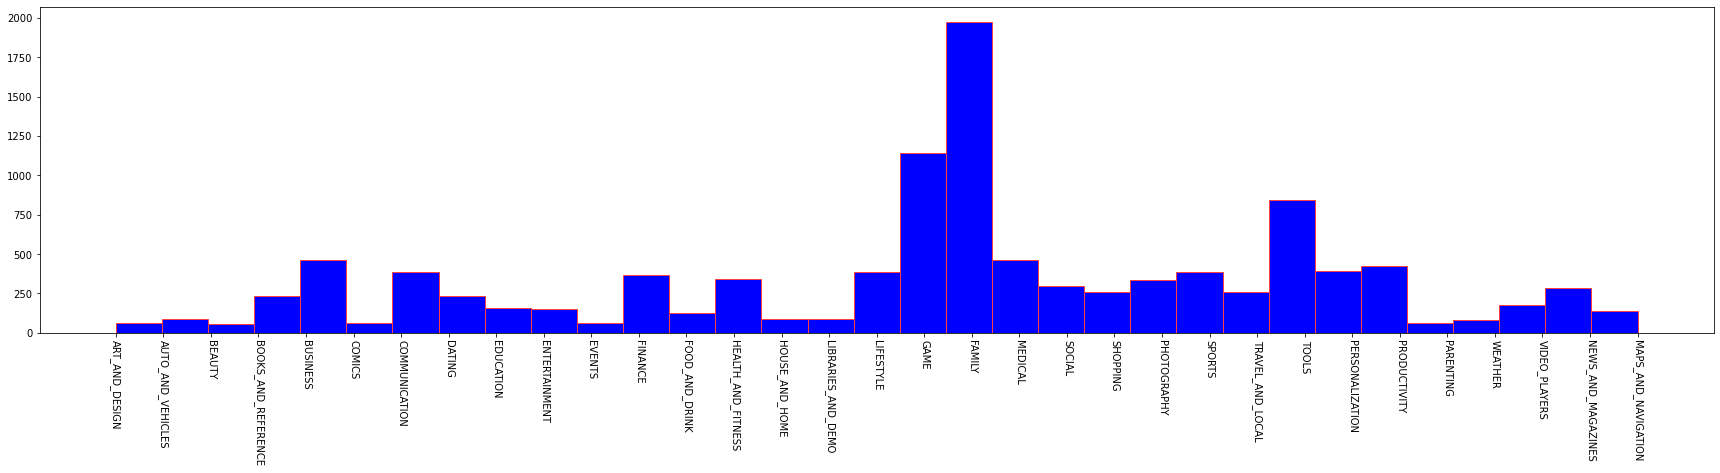

In [21]:
plt.figure(figsize=(30,6))
plt.hist(data['Category'], bins = len(data['Category'].value_counts()), edgecolor="#FF4040",color  ="Blue", histtype='bar')
plt.xticks(rotation=-90)   #rotates the info on x-axis
plt.show()

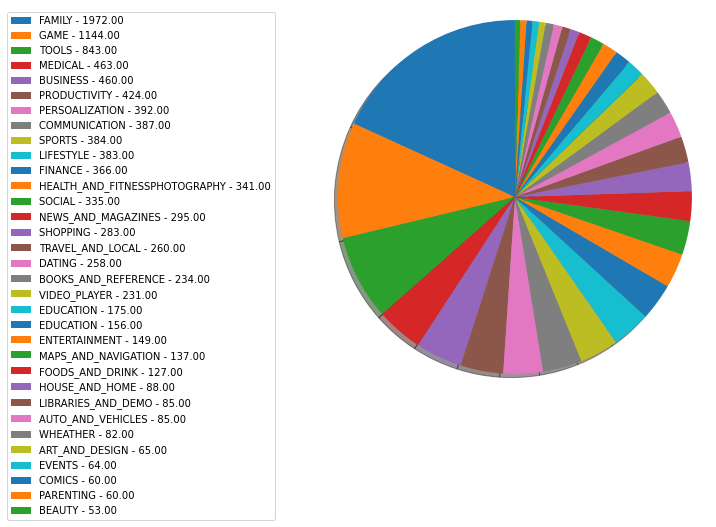

In [22]:
#Let's see the same in the form of a pie chart

#plt.figure(figsize=(100,80))
labels=['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',\
       'PERSOALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE', 'FINANCE', 'HEALTH_AND_FITNESS'\
       'PHOTOGRAPHY', 'SOCIAL', 'NEWS_AND_MAGAZINES', 'SHOPPING', 'TRAVEL_AND_LOCAL', 'DATING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYER',\
       'EDUCATION', 'EDUCATION', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION', 'FOODS_AND_DRINK', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'AUTO_AND_VEHICLES',\
       'WHEATHER', 'ART_AND_DESIGN', 'EVENTS', 'COMICS', 'PARENTING', 'BEAUTY']
sizes = data['Category'].value_counts()
fig, ax=plt.subplots()

patches, texts = ax.pie(sizes,shadow=True, startangle=90)

labels = ['{0} - {1:1.2f}'.format(i,j) for i, j in zip(labels,sizes)]
sort_legend = False

plt.legend(patches, labels, loc= 'best', bbox_to_anchor=(-0.1, 1.), fontsize = 10)
ax.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


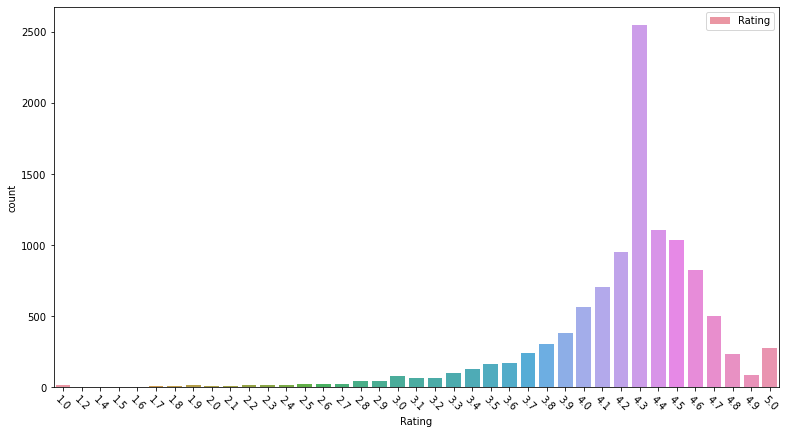

In [23]:
plt.figure(figsize=(13,7))
sns.countplot(data['Rating'], label = "Rating")
plt.legend(loc= 'best')
plt.xticks(rotation= -45)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


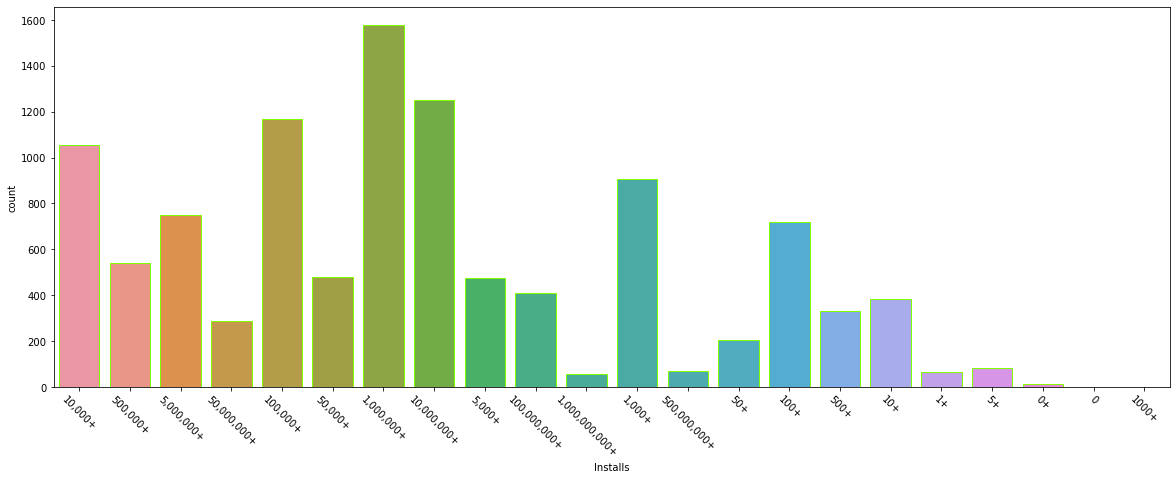

In [24]:
plt.figure(figsize=(20,7))
sns.countplot(data['Installs'], edgecolor = "#7FFF00")
plt.xticks(rotation = -45)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


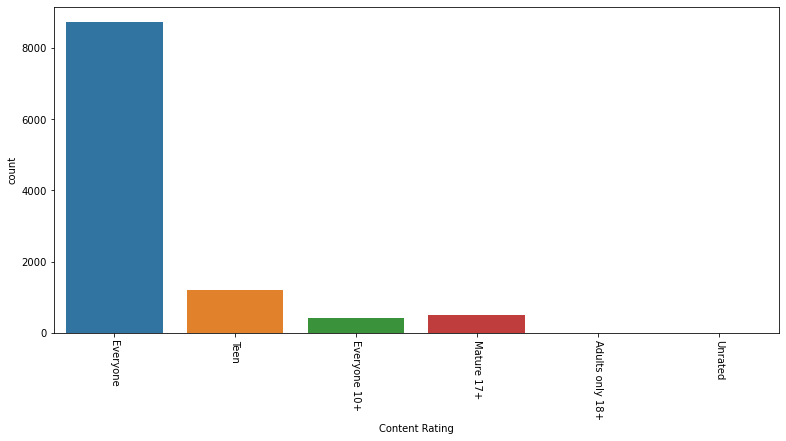

In [25]:
plt.figure(figsize=(13,6))
sns.countplot(data['Content Rating'])
plt.xticks(rotation=-90)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


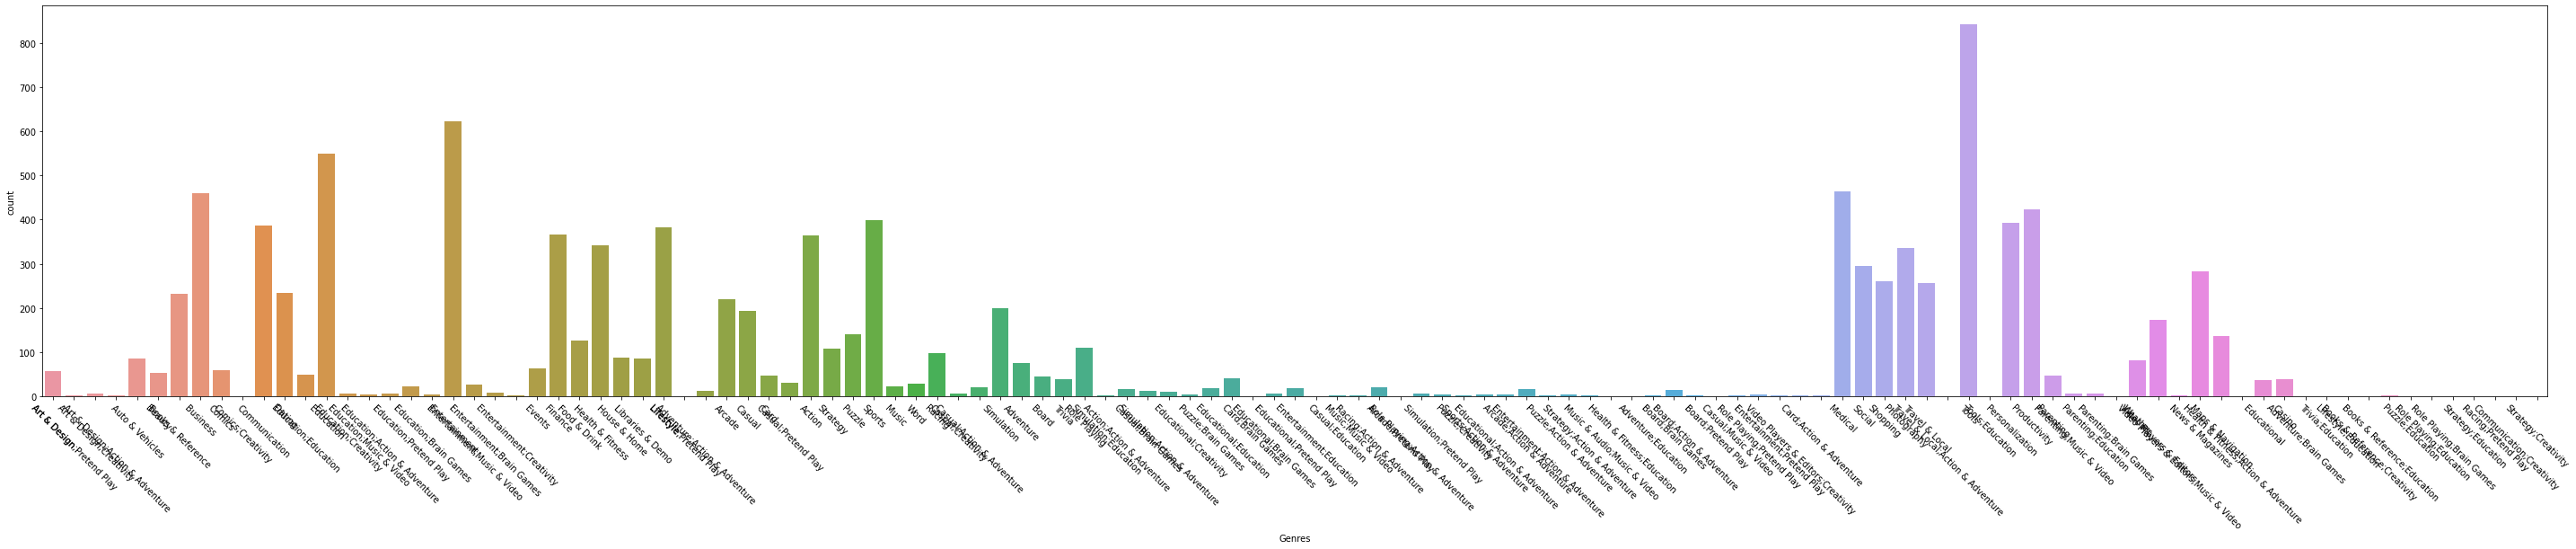

In [26]:
plt.figure(figsize=(50,8))
sns.countplot(data['Genres'])
plt.xticks(rotation = -45)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


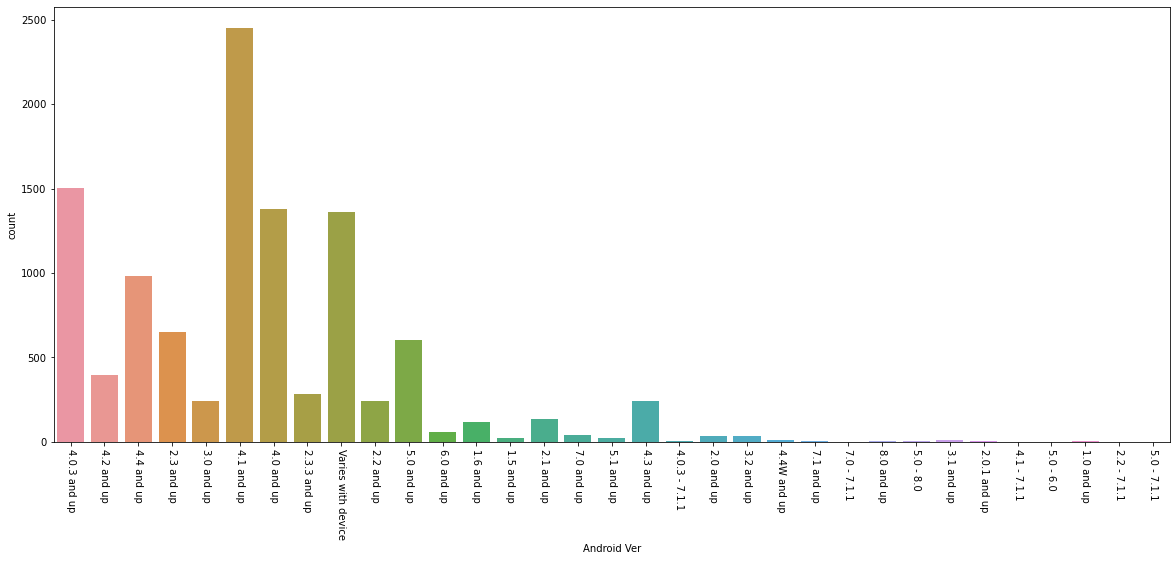

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(data['Android Ver'])
plt.xticks(rotation = -90)
plt.show()

In [29]:
# function for replacing M in size as million and K as thousand
def change_size(d):
    if "M" in d:
        d = d.replace("M","")
        try:
            d = int(d)*10**6
            return d
        except ValueError:
            d = int(float(d)*10**6)
            return d
    elif "k" in d:
        d = d.replace("k","")
        try:
            d = int(d)*1000
            return d
        except ValueError:
            d = int(float(d)*1000)
            return d
    else:
        d = 0
        return d
    
data['Size'] = data['Size'].apply( lambda x: change_size(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [30]:
# Function to remove , and + from Installs
def remove_plus_and_comma(x):
    x = x.replace(",","")
    x = x.replace("+","")
    return int(x)
data['Installs'] = data['Installs'].apply(lambda x: remove_plus_and_comma(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [31]:
#Lets work on our categorical values: Category, Type, Content Rating, Genre
#Category:
dummy_C = pd.get_dummies(data['Category'])
data = pd.concat([data , dummy_C], axis = 1)

In [32]:
#Type
dummy_T = pd.get_dummies(data['Type'])
data = pd.concat([data, dummy_T], axis = 1)

#Genres
dummy_G = pd.get_dummies(data["Genres"])
data = pd.concat([data, dummy_G], axis = 1)

#Content Rating
dummy = pd.get_dummies(data['Content Rating'])
data = pd.concat([data, dummy], axis = 1)

In [33]:
datamodel = data.drop(["Category", "Type", "Content Rating", "Genres", "App", "Last Updated", "Current Ver", "Android Ver"], axis =1)
datamodel

,Rating,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,...,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19000000,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,4.5,38,53000000,5000,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,5.0,4,3600000,100,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10838,4.3,3,9500000,1000,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,4.5,114,0,1000,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
#Predicting Ratings using Regression models: Linear Regression, Random Forest Regression
from sklearn.model_selection import train_test_split
X = datamodel.loc[:, datamodel.columns != "Rating"]
y = datamodel['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Reviews      Size    Installs  Price  ART_AND_DESIGN  AUTO_AND_VEHICLES  \
4610    18522         0     1000000    0.0               0                  0   
341   3419249         0  1000000000    0.0               0                  0   
1084    31804   9800000     5000000    0.0               0                  0   
2099    58795  77000000    10000000    0.0               0                  0   
8437    41683  63000000     1000000    0.0               0                  0   
...       ...       ...         ...    ...             ...                ...   
9372    13388   7100000      500000    0.0               0                  0   
7291        1   2300000         100    0.0               0                  0   
1344    77563  39000000    10000000    0.0               0                  0   
7293        6   1100000        1000    0.0               0                  0   
1289   559186         0    10000000    0.0               0                  0   

      BEAUTY  BOOKS_AND_REF

In [35]:

#Let's make the linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(model)
y_predict = model.predict(X_test)
print('predicted values: ',y_predict)

LinearRegression()
predicted values:  [4.16444313 4.13049436 4.28767842 ... 4.18492278 4.16668487 4.13501079]


In [36]:
predict_dataframe = pd.DataFrame(data={"Predicted": y_predict, "Actual": y_test})
predict_dataframe

,Predicted,Actual
212,4.164443,4.1
6547,4.130494,4.4
2378,4.287678,4.5
5744,4.073981,4.2
3793,4.164898,4.2
...,...,...
4965,4.203828,4.3
3001,4.243882,3.3
2811,4.184923,4.7
3777,4.166685,3.9


<AxesSubplot:>

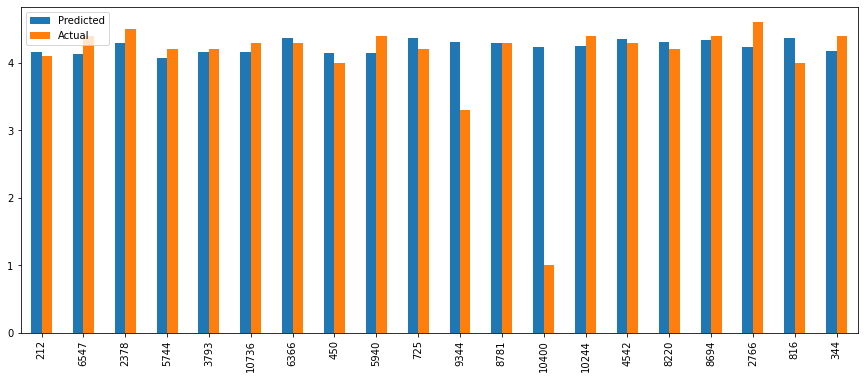

In [37]:
predict_dataframe[:20].plot(kind = "bar", figsize = (15,6))

In [38]:
model.score(X_test, y_test)

0.04122786815609503

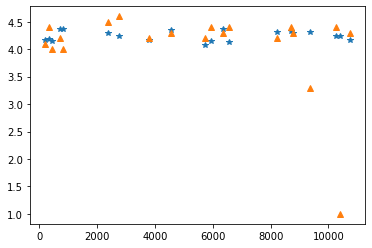

In [39]:
plt.plot(predict_dataframe["Predicted"][:20], "*")
plt.plot(predict_dataframe['Actual'][:20], "^")
plt.show()

In [40]:
#Lets make Random Forest Regresor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
modef_rfr = rfr.fit(X_train, y_train)
y_predict_rfr = modef_rfr.predict(X_test)
rfr_df = pd.DataFrame(data={"Predicted": y_predict_rfr, "Actual": y_test})
rfr_df

,Predicted,Actual
212,4.023,4.1
6547,4.548,4.4
2378,4.340,4.5
5744,3.884,4.2
3793,4.473,4.2
...,...,...
4965,4.513,4.3
3001,3.763,3.3
2811,4.396,4.7
3777,4.185,3.9


<AxesSubplot:>

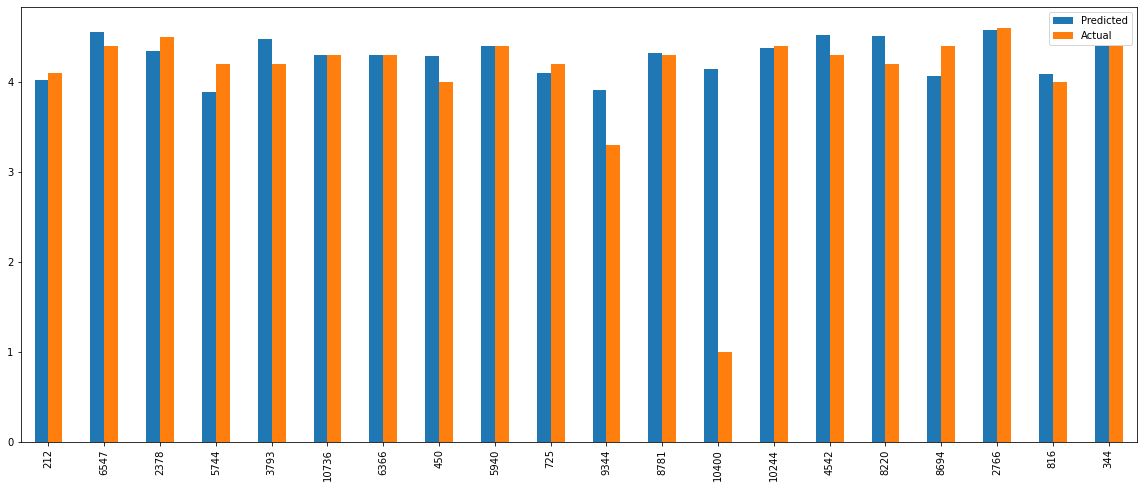

In [41]:
rfr_df[:20].plot(kind = "bar", figsize = (20,8))

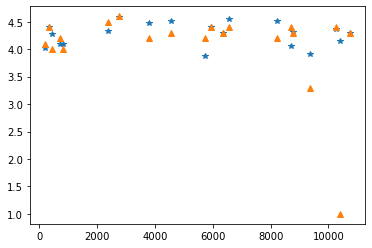

In [42]:
plt.plot(rfr_df["Predicted"][:20], "*")
plt.plot(rfr_df['Actual'][:20], "^")
plt.show()

In [43]:
#Accuracy
modef_rfr.score(X_test, y_test)

0.13233179754711955

In [44]:
#Model Scores and Conclusion
print("Linear Regression Score: ", model.score(X_test, y_test))
print("Random Forest Regressor Score: ", modef_rfr.score(X_test, y_test))

Linear Regression Score:  0.04122786815609503
Random Forest Regressor Score:  0.13233179754711955
